In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
df=pd.read_csv('https://lukeb.co//python_csv')
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
import ast 
df['job_skills'] = df['job_skills'].apply(
    lambda skill: ast.literal_eval(skill) if isinstance(skill, str) else skill
)

c:\Users\HP\anaconda3\envs\pn_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
import seaborn as sns

In [10]:
df_US=df[df['job_country'] =='United States'].dropna(subset=['salary_year_avg'])

In [ ]:
job_titles=df_US['job_title_short'].value_counts().index[:6].to_list()
# list is iterable and we need it in isin()

In [16]:
df_US_top6=df_US[df_US['job_title_short'].isin(job_titles)]

In [24]:
list_job_order=df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

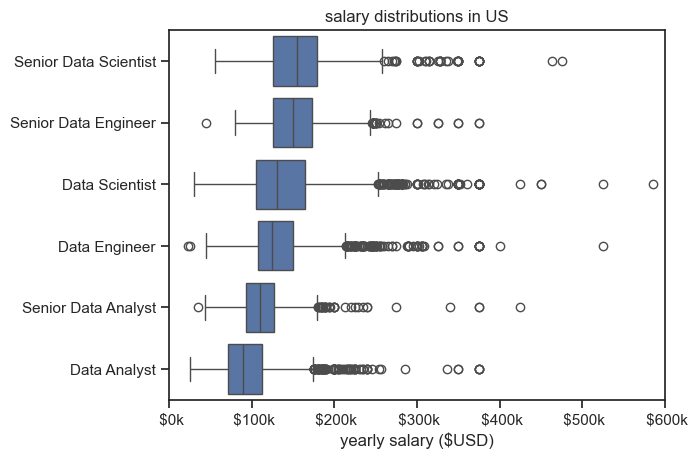

In [41]:
sns.boxplot(data=df_US_top6,x='salary_year_avg',y='job_title_short',order=list_job_order)
plt.title('salary distributions in US')
plt.xlabel('yearly salary ($USD)')
plt.ylabel('')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f' ${int(x/1000)}k'))
plt.xlim(0,600000)
plt.show()

## investigate Median Salary vs skill for Data Analyst

In [26]:
df_DA_US=df[(df['job_title_short']== 'Data Analyst') & (df['job_country']=='United States')].copy()

In [43]:
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])


In [28]:
df_DA_US=df_DA_US.explode('job_skills')


,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [ ]:
df_DA_top_pay=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)
df_DA_top_pay=df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


## We want to get a DataFrame with the most popular skills that have the highest pay.

In [39]:
df_DA_skills=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_skills=df_DA_skills.head(10).sort_values(by='median',ascending=False)
df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


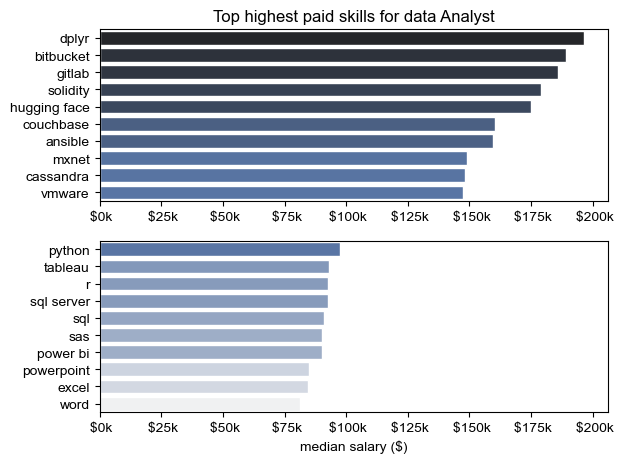

In [40]:
fig,ax= plt.subplots(2,1)

sns.set_theme(style="ticks")

#x will median and y is skills

sns.barplot(data=df_DA_top_pay, x='median',y= df_DA_top_pay.index ,ax=ax[0], hue='median',palette="dark:b_r")
#Reverse the colormap by adding "_r":
#sns.barplot() always column assigned to x is length of the bar and the column assigned to y(categories)

ax[0].set_title('Top highest paid skills for data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f' ${int(x/1000)}k'))
ax[0].legend().remove ()
# same thing ax[0].legend().set_visible(False)


sns.barplot(data=df_DA_skills,x='median',y=df_DA_skills.index,ax=ax[1],hue='median',palette="light:b")
#df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].set_xlim(ax[0].get_xlim())
#ax[1].set_title('Top 10 most In_Demand skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('median salary ($)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f' ${int(x/1000)}k'))
ax[1].legend().remove()


fig.tight_layout()

In [ ]:
#The `order` parameter controls the order of categories shown on the axis. Without `order`, Seaborn 
# arranges categories alphabetically  With `order`, you control the display order manually.